# Ensembles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

## Dataset of Average Power Consumption (MW) per 30-minute interval in France. 

In [2]:
df=pd.read_csv('FranceElec.csv', delimiter=';')
print('No. of rows and columns:', df.shape)
df.head(5)

No. of rows and columns: (173856, 5)


,Date - Heure,Date,Hour,Consumption,Quality
0,2009-06-05T21:00:00-07:00,2009-06-06,06:00,35984,Définitive
1,2009-06-06T00:00:00-07:00,2009-06-06,09:00,43188,Définitive
2,2009-06-06T02:30:00-07:00,2009-06-06,11:30,46959,Définitive
3,2009-06-06T03:30:00-07:00,2009-06-06,12:30,48622,Définitive
4,2009-06-06T11:30:00-07:00,2009-06-06,20:30,42578,Définitive


In [3]:
df.Quality.unique()

array(['Définitive', 'Intermédiaire'], dtype=object)

In [4]:
df.dtypes

Date - Heure    object
Date            object
Hour            object
Consumption      int64
Quality         object
dtype: object

### Check Missing Values

In [5]:
df.isnull().sum()

Date - Heure    0
Date            0
Hour            0
Consumption     0
Quality         0
dtype: int64

No missing Values in the dataset

#### Convert Time into Date Time Index and Create Year, Quarter, Month and Day

In [6]:
df['Time']=pd.to_datetime(df['Date - Heure']) 
#DatetimeIndex, which is a pandas index that is optimized to index data with dates and times.
df['year'] = df['Time'].apply(lambda x: x.year)
df['quarter'] = df['Time'].apply(lambda x: x.quarter)
df['month'] = df['Time'].apply(lambda x: x.month)
df['day'] = df['Time'].apply(lambda x: x.day)

In [7]:
df=df[df.Quality=='Définitive']
df=df[(df.year>2007) & (df.year<2017)]
df=df.loc[:,['Time','Consumption', 'year','quarter','month','day']]
df.sort_values('Time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["Time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print(df.shape)
print(df.Time.min())
print(df.Time.max())
df.tail(3)

(157822, 7)
2008-01-01 00:00:00
2016-12-31 22:30:00


,Time,Consumption,year,quarter,month,day,weekday
157819,2016-12-31 21:30:00,71924,2016,4,12,31,0
157820,2016-12-31 22:00:00,75424,2016,4,12,31,0
157821,2016-12-31 22:30:00,75504,2016,4,12,31,0


2008 is a leap year, so there are 366 days in the year.

## Basics Statistics

In [8]:
df.head(3)

,Time,Consumption,year,quarter,month,day,weekday
0,2008-01-01 00:00:00,63949,2008,1,1,1,1
1,2008-01-01 00:30:00,64198,2008,1,1,1,1
2,2008-01-01 01:00:00,64190,2008,1,1,1,1


### Distribution and Normality Test

count   157822.00
mean     55218.38
std      12101.42
min      29477.00
25%      46002.00
50%      53688.00
75%      63558.75
max     101866.00
Name: Consumption, dtype: float64
Kurtosis of normal distribution (should be 0): -0.3529417108831727
Skewness of normal distribution (should be 0): 0.46731018121424756


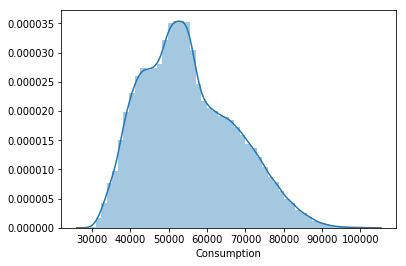

In [9]:
print(df.Consumption.describe())

sns.distplot(df.Consumption);

stats.normaltest(df.Consumption)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(df.Consumption)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(df.Consumption)))

KURTOSIS: describes heaviness of the tails of a distribution

Normal Distribution has a kurtosis of 0 (mesokurtic)
A positive value tells you that you have heavy-tails (i.e. a lot of data in your tails).
A negative value means that you have light-tails (i.e. little data in your tails).

SKEWNESS:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

## Time Series Plot

In [10]:
df1=df.loc[:,['Time','Consumption']]
#df1['Time'] = df['Time'].apply(lambda x: x.date())
#df1['Time']=pd.to_datetime(df1['Time'])
df1.set_index('Time',inplace=True);

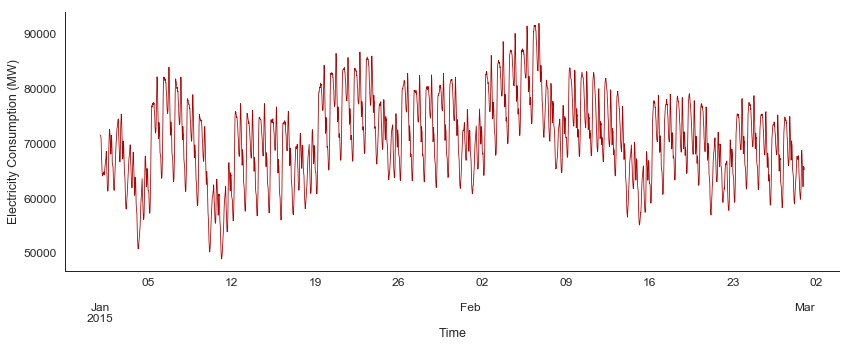

In [60]:
df2=df1[(df1.index>='2015-01-01') & (df1.index<'2015-03-01')]
#a=plt.figure(figsize=(15,6))
#sns.set_style("whitegrid", {'axes.grid' : False});
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
#a = fig.gca()  

df2.plot(figsize=(12,5), color='#b30000', linewidth=0.8, fontsize=12);
#plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.box(False)
plt.ylabel('Electricity Consumption (MW)')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
#plt.savefig('Fig1.png', dpi=300)

### ACF Plot at 30 minutes Granularity

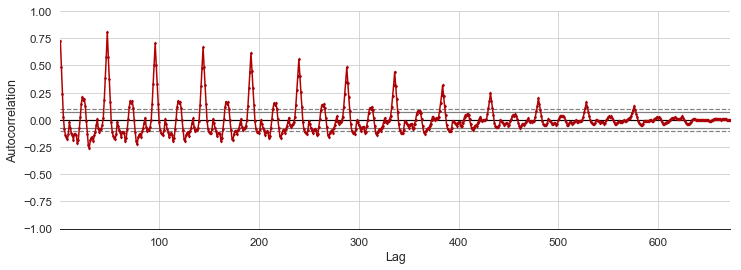

In [61]:
ac=df1.Consumption
#ac = np.diff(ac, n=1)
ac = np.log(ac)
ac = np.diff(ac, n=1)
from pandas.tools.plotting import autocorrelation_plot

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
fig = plt.figure(figsize=(12,4))
autocorrelation_plot(ac[:672], linewidth=1.5, color='#b30000', marker='d', 
                     markersize=2, markerfacecolor='#002db3')
sns.despine(left=True)
plt.savefig('Fig3.png', bbox_inches='tight', dpi=400)

### ACF Plot for Days

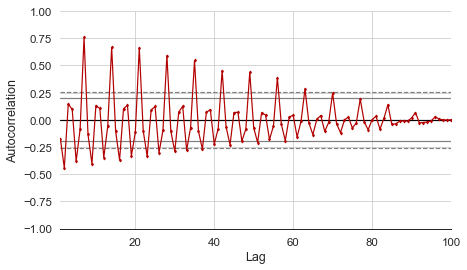

In [76]:
ac=df1.Consumption.resample('D').mean()
#ac = np.diff(ac, n=1)
ac = np.log(ac)
ac = np.diff(ac, n=2)
from pandas.tools.plotting import autocorrelation_plot

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
fig = plt.figure(figsize=(7,4))
autocorrelation_plot(ac[:100], color='#b30000', marker='d', markersize=2)
sns.despine(left=True)
plt.savefig('Fig3.png', bbox_inches='tight', dpi=450)

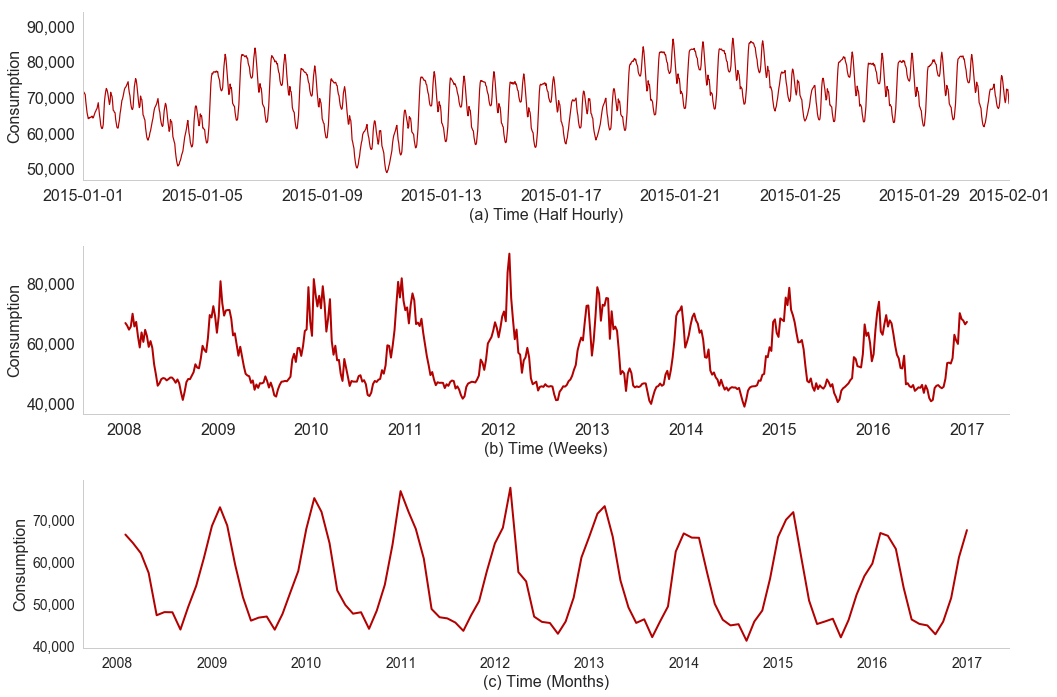

In [88]:
sns.set_style("whitegrid", {'axes.grid' : False})

df2=df1[(df1.index>='2015-01-01') & (df1.index<'2015-02-10')]

#sns.set_style('white')
sns.set_context("paper", font_scale=1.8)  
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=.1)
ax1 = fig.add_subplot(3,1,1)

ax1.plot(df2['Consumption'],color='#b30000')
ax1.set_xlabel('(a) Time (Half Hourly)', fontsize=16)
ax1.set_ylabel('Consumption', fontsize=16)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.set_xlim('2015-01-01', '2015-02-01')
ax1.tick_params(axis='both', which='major', labelsize=16)

ax2 = fig.add_subplot(3,1,2)
ax2.plot(df1['Consumption'].resample('W').mean(),linewidth=2, color='#b30000')
ax2.set_ylabel('Consumption', fontsize=16)
ax2.set_xlabel('(b) Time (Weeks)', fontsize=16)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.tick_params(axis='both', which='major', labelsize=16)

ax3 = fig.add_subplot(3,1,3)
ax3.plot(df1['Consumption'].resample('M').mean(),linewidth=2, color='#b30000')
ax3.set_ylabel('Consumption', fontsize=16)
ax3.set_xlabel('(c) Time (Months)', fontsize=16)
ax3.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax3.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
sns.despine(top=True)
plt.legend().set_visible(False)
plt.savefig('Fig1.1.png', dpi=350)

In [16]:
dfq.head(2)

,Time,Consumption,year,quarter,month,day,weekday
0,2008-01-01 00:00:00,63949,2008,1,1,1,1
1,2008-01-01 00:30:00,64198,2008,1,1,1,1


In [34]:
q = df["Consumption"].quantile(0.97)
dfq=df[df["Consumption"] < q]

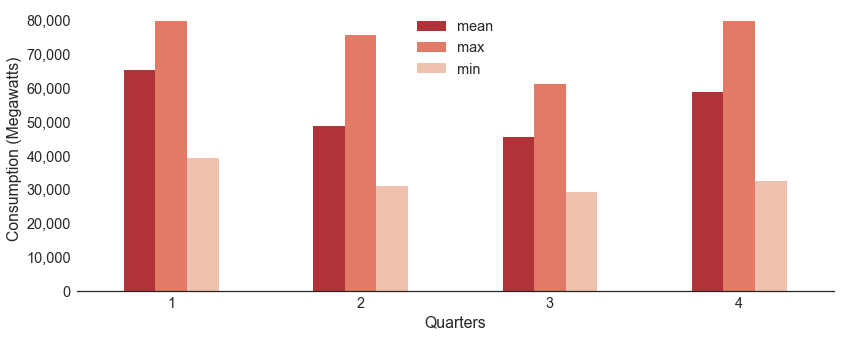

In [56]:
sns.set_style('white')
sns.set_palette("Reds_r",3,0.7)
sns.set_context("paper", font_scale=1.8) 
ax1 = fig.add_subplot(1,1,1)

ax1=dfq.groupby('quarter').Consumption.agg(['mean','max','min']).plot(kind='bar', figsize=(12,5));
plt.xlabel('Quarters')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
sns.despine(left=True)
plt.ylabel('Consumption (Megawatts)')

plt.xticks(rotation='horizontal')
plt.legend(loc='upper center');
plt.tight_layout()
plt.savefig('Fig3.png', bbox_inches='tight', dpi=400)

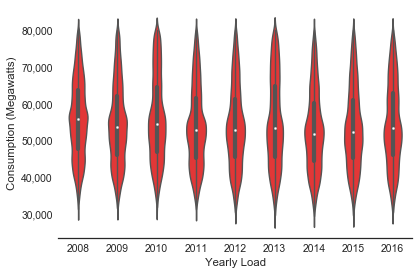

In [58]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
#a=plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,1,1)
plt.subplots_adjust(wspace=0.2)
ax1=sns.violinplot(x="year", y="Consumption",  width=0.5,data=dfq, color='#ff1a1a');
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Yearly Load')
plt.ylabel('Consumption (Megawatts)')
sns.despine(left=True);
plt.tight_layout() 
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.savefig('Fig2.png',bbox_inches='tight', dpi=400)

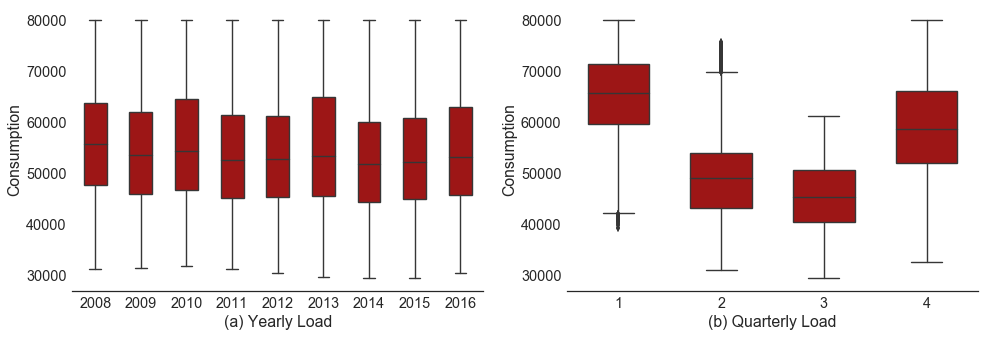

In [37]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.8)  
a=plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="Consumption", width=0.5, data=dfq, color='#b30000');
plt.xlabel('(a) Yearly Load')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(1,2,2)

sns.boxplot(x="quarter", y="Consumption", width=0.6, data=dfq, color='#b30000');
plt.xlabel('(b) Quarterly Load')
sns.despine(left=True);
plt.tight_layout() 

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.savefig('Fig2.png', dpi=300)

## Electricty Consumption Distribution

,count,mean,std,min,25%,50%,75%,max
Consumption,157822.00,55218.38,12101.42,29477.00,46002.00,53688.00,63558.75,101866.00


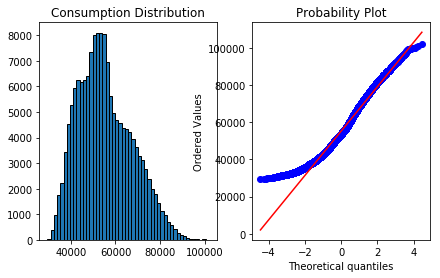

In [8]:
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
df['Consumption'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Consumption'], plot=plt);
#print("Skewness: %f" % df['Consumption'].skew())
#print("Kurtosis: %f" % df['Consumption'].kurt())
df1.describe().transpose()

Normal probability plot shows the data set is approximately normally distributed. 

### Consumption by Year, Quarter, Month and Day

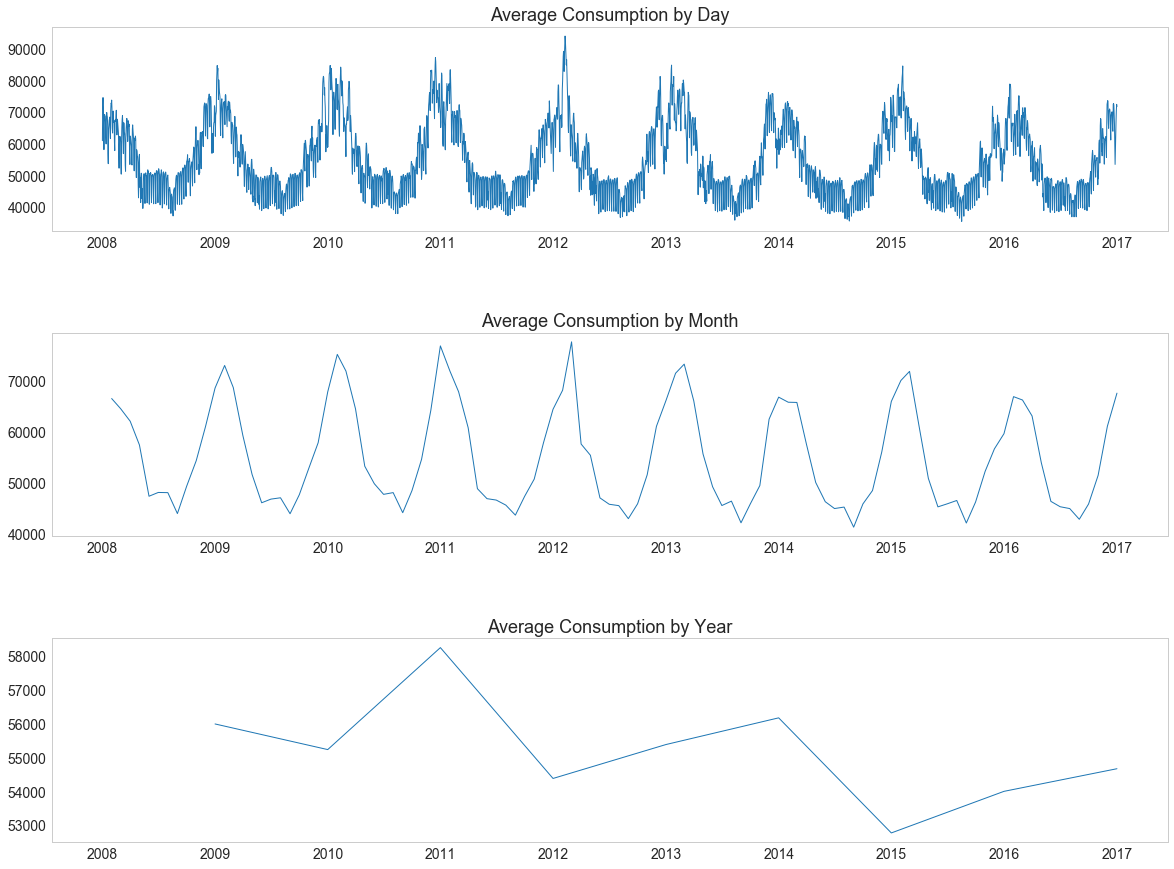

In [25]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df1['Consumption'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Consumption by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df1['Consumption'].resample('M').mean(),linewidth=1)
ax2.set_title('Average Consumption by Month', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df1['Consumption'].resample('A').mean(),linewidth=1)
ax3.set_title('Average Consumption by Year', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

The time series has no general trend,upward or downward. The regression or trend line can then not be used as a prediction of the long run movement of the time series. 

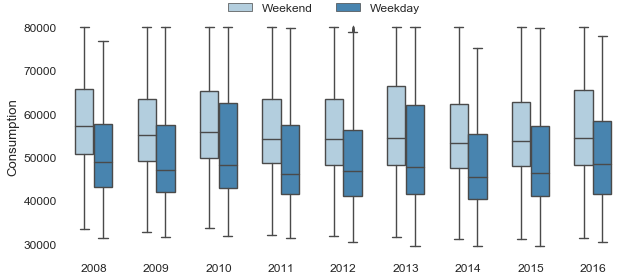

In [21]:
q = df["Consumption"].quantile(0.97)
dfq=df[df["Consumption"] < q]

dic={0:'Weekday',1:'Weekend'}
dfq['Day'] = dfq.weekday.map(dic)

a=plt.figure(figsize=(9,4))
sns.set_context("paper", font_scale=1.5)  
plt1=sns.boxplot('year','Consumption',hue='Day',width=0.6,fliersize=3,
                    data=dfq, palette='Blues');                                                                                                                                                                                                                                                                                                                                             
#plt.title('Box Plot of Consumption by Weekend/Weekday')    
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False)
plt.savefig('Fig3.png', dpi=300)

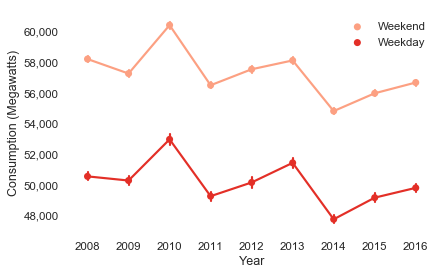

In [85]:
dic={0:'Weekday',1:'Weekend'}
df['Day'] = df.weekday.map(dic)

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
#ax1 = plt.subplot(1,1,1)
g=sns.factorplot('year','Consumption',hue='Day',
                    data=df, size=4,palette='Reds', aspect=1.6, legend=False);   
g.ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()    
plt.xlabel('Year')
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right',frameon=False);
plt.ylabel('Consumption (Megawatts)')
plt.tight_layout()
plt.savefig('Fig3.png', bbox_inches='tight', dpi=400)

## Time Series Decomposition. 
### Downsampled to Day for Visualization
Time Series Decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [16]:
type(df2)

pandas.core.frame.DataFrame

Text(0.5,1,'Residual')

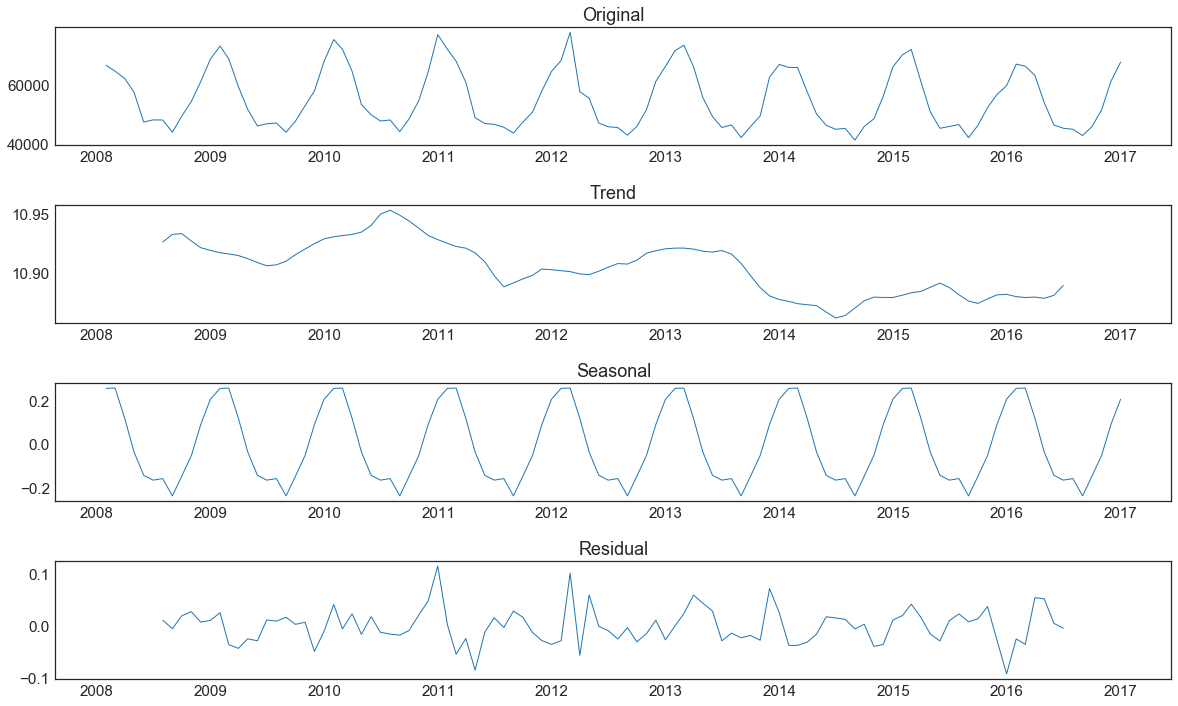

In [17]:
df2 = df1['Consumption'].resample('M').mean().to_frame()

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df2.Consumption))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(4,1,1)
ax1.plot(df2,linewidth=1)
ax1.set_title('Original', fontsize=18)

ax2 = fig.add_subplot(4,1,2, sharex=ax1)
ax2.plot(trend,linewidth=1)
ax2.set_title('Trend', fontsize=18)

ax3  = fig.add_subplot(4,1,3, sharex=ax1)
ax3.plot(seasonal,linewidth=1)
ax3.set_title('Seasonal', fontsize=18)

ax4  = fig.add_subplot(4,1,4, sharex=ax1)
ax4.plot(residual,linewidth=1)
ax4.set_title('Residual', fontsize=18)

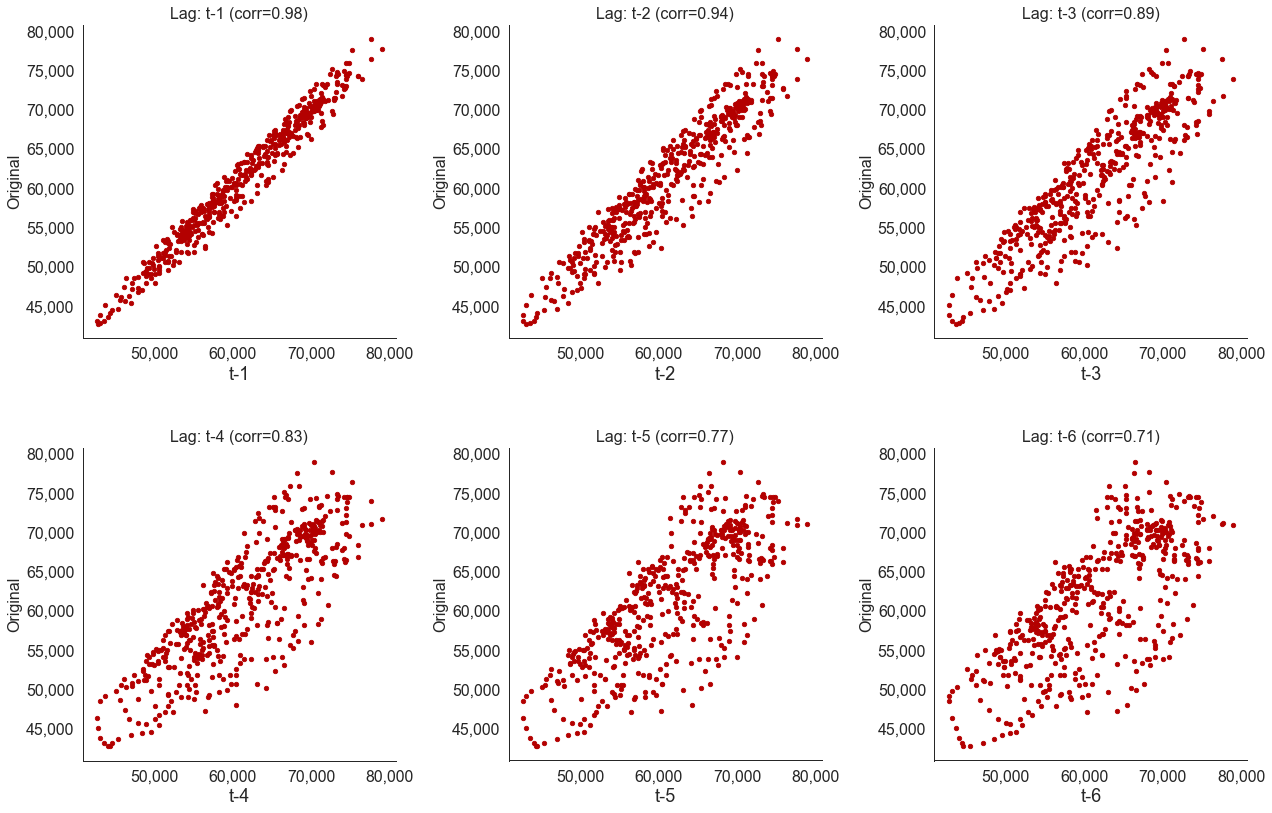

In [90]:
sns.set_style('white')
#df3=df1[50000:51000]
df3=df1[50000:50500]
import statsmodels.tsa.api as smt
 
# build scatterplot
ncols = 3
nrows = 2
lags = 6
 
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6 * ncols, 6 * nrows))
 
for ax, lag in zip(axes.flat, np.arange(1, lags + 1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([df3, df3.shift(-lag)], axis=1, keys=['y']+[lag_str]).dropna())
    
    # plot data
    X.plot(ax=ax, kind='scatter', color='#b30000', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original',fontsize=16);
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    ax.set_xlabel(lag_str,fontsize=18);
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr), fontsize=16);
    ax.set_aspect('equal');
    
    # top and right spine from plot
    sns.despine();
 
plt.tight_layout()
plt.savefig('Fig3.png', bbox_inches='tight', dpi=350)
plt.show()

The residual mean for every quarter is different and data exhibits seasonailty

# Weather Data

In [14]:
dfw=pd.read_csv('weatherFrance.csv')
dfw.head()
print(dfw.shape)

(179481, 4)


In [15]:
list_df=[]
dfw["Time"]=pd.to_datetime(dfw["Time"])
dfw["wind_speed"]=pd.to_numeric(dfw["wind_speed"],errors="coerce")
dfw=dfw[(dfw["wind_speed"]<200) & (dfw["wind_speed"]>0)]
dfw=dfw[(dfw["temperature"]>-20) & (dfw["temperature"]<50)]
dfw=dfw[(dfw["humidity"]>0) & (dfw["humidity"]<100)]

dfw=dfw[["Time","temperature","humidity","wind_speed"]].set_index(["Time"])
for param in ["temperature","humidity","wind_speed"]:
    print(param)
    list_df.append(dfw[[param]].resample('30T').interpolate(method='linear'))
dfw=pd.concat(list_df,axis=1).reset_index()
dfw.set_index ('Time', inplace=True)
dfw.head()

temperature
humidity
wind_speed


,temperature,humidity,wind_speed
Time,,,
2007-06-06 14:30:00,22.97,62.56,17.07
2007-06-06 15:00:00,22.87,63.82,17.17
2007-06-06 15:30:00,22.47,64.95,17.16
2007-06-06 16:00:00,22.19,67.34,16.84
2007-06-06 16:30:00,22.17,67.24,16.93


In [16]:
df0=df.loc[:,['Time','Consumption','quarter', 'month','day','weekday']]
df0.set_index('Time', inplace=True)
df0.head(2)

,Consumption,quarter,month,day,weekday
Time,,,,,
2008-01-01 00:00:00,63949,1,1,1,1
2008-01-01 00:30:00,64198,1,1,1,1


In [17]:
dfp=dfw.join(df0,how='inner')[['Consumption','quarter', 'month', 'day', 'weekday',"temperature",'humidity','wind_speed']]

#dfp=dfp.resample('W', how=np.mean)
#df = df.rename(columns={'temperature': 'Temperature', 'humidity': 'Humidity', 'wind_speed':'Wind Speed'})

dfp.columns = ['Consumption', 'Quarter', 'Month', 'Day', 'Weekday', 'Temperature','Humidity','Wind_Speed']
dfp.head(3)

,Consumption,Quarter,Month,Day,Weekday,Temperature,Humidity,Wind_Speed
Time,,,,,,,,
2008-01-01 00:00:00,63949,1,1,1,1,2.52,88.91,6.74
2008-01-01 00:30:00,64198,1,1,1,1,2.56,89.43,6.40
2008-01-01 01:00:00,64190,1,1,1,1,2.52,89.54,6.88


In [18]:
dfp=dfw.join(df0,how='inner')[['Consumption','quarter', 'month', 'weekday',"temperature",'humidity','wind_speed']]

#dfp=dfp.resample('W', how=np.mean)
#df = df.rename(columns={'temperature': 'Temperature', 'humidity': 'Humidity', 'wind_speed':'Wind Speed'})

dfp.columns = ['Consumption', 'Quarter', 'Month', 'Weekday', 'Temperature','Humidity','Wind_Speed']
dfp.head()

,Consumption,Quarter,Month,Weekday,Temperature,Humidity,Wind_Speed
Time,,,,,,,
2008-01-01 00:00:00,63949,1,1,1,2.52,88.91,6.74
2008-01-01 00:30:00,64198,1,1,1,2.56,89.43,6.40
2008-01-01 01:00:00,64190,1,1,1,2.52,89.54,6.88
2008-01-01 01:30:00,64104,1,1,1,2.48,90.00,6.75
2008-01-01 02:00:00,62182,1,1,1,2.41,89.94,6.97


### Joint Plot

## Week Resolution Weather Regression Plot

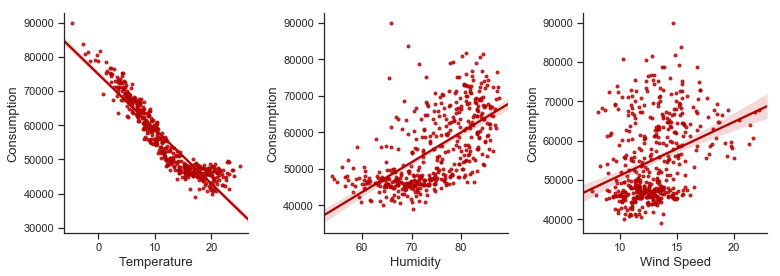

In [19]:
dfweek=dfp.resample('W', how=np.mean)
dfweek=dfweek[['Consumption','Temperature','Humidity','Wind_Speed']]
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.9)  

fig = plt.figure(figsize=(11,4))
sns.set(style="ticks")
#fig.subplots_adjust(hspace=.1)

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.regplot(x="Temperature", y="Consumption", data=dfweek, marker='.', color='#b30000')
ax1.set_ylabel('Consumption', fontsize=13)
ax1.set_xlabel('Temperature', fontsize=13)
plt.tight_layout()

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.regplot(x="Humidity", y="Consumption", data=dfweek, marker='.', color='#b30000')
ax2.set_ylabel('Consumption', fontsize=13)
ax2.set_xlabel('Humidity', fontsize=13)
plt.tight_layout()

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.regplot(x="Wind_Speed", y="Consumption", data=dfweek, marker='.',color='#b30000')
ax3.set_ylabel('Consumption', fontsize=13)
ax3.set_xlabel('Wind Speed', fontsize=13)
plt.tight_layout()
sns.despine(top=True)

plt.savefig('Fig4.png', dpi=300)

<Figure size 288x288 with 0 Axes>

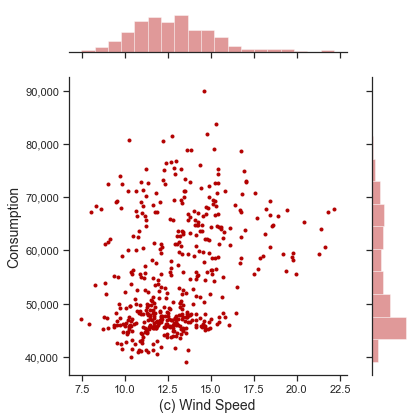

In [20]:
dfweek=dfp.resample('W', how=np.mean)
dfweek=dfweek[['Consumption','Temperature','Humidity','Wind_Speed']]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)  

ax = plt.figure(figsize=(4,4))
sns.set(style="ticks")
g = sns.jointplot(x="Wind_Speed", y="Consumption", data=dfweek, marker='.', color='#b30000')
g.set_axis_labels('(c) Wind Speed','Consumption',fontsize=14)
g.ax_joint.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout();
#plt.savefig('Fig4.3.png', bbox_inches='tight', dpi=350)

## Log and First Difference for Statsmodel

In [27]:
df2 = df1['Consumption'].resample('D').mean().to_frame()
df2 = np.log(df2)
df2=df2.diff()
df2.dropna(inplace=True)
df2.head()

,Consumption
Time,
2008-01-02,0.17
2008-01-03,0.03
2008-01-04,-0.04
2008-01-05,-0.12
2008-01-06,-0.09


In [28]:
for obs in range(1,31):
    df2["T_" + str(obs)] = df2.Consumption.shift(obs)
    
#df.fillna(0.00,inplace=True)
df2=df2.dropna()
df2.head(2) 

,Consumption,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
Time,,,,,,,,,,,,,,,,,,,,,
2008-02-01,-0.04,0.02,-0.00,0.03,0.14,-0.03,-0.07,0.01,0.01,0.03,...,-0.03,-0.00,-0.01,0.05,0.12,-0.09,-0.12,-0.04,0.03,0.17
2008-02-02,-0.09,-0.04,0.02,-0.00,0.03,0.14,-0.03,-0.07,0.01,0.01,...,-0.07,-0.03,-0.00,-0.01,0.05,0.12,-0.09,-0.12,-0.04,0.03


In [32]:
import statsmodels.api as sm
X = df2.iloc[:,1:]
y = df2.Consumption

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     375.0
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        10:21:14   Log-Likelihood:                 6023.6
No. Observations:                3257   AIC:                        -1.199e+04
Df Residuals:                    3227   BIC:                        -1.180e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T_1           -0.0433      0.018     -2.460      0.014      -0.078      -0.009
T_2           -0.1139      0.018     -6.460      0.000      -0.148      -0.079
T_3           -0.1163      0.017     -6.656      0.000      -0.151      -0.082
T_4           -0.1297      0.018     -7.388      0.000      -0.164      -0.095
T_5           -0.1201      0.018     -6.775      0.000      -0.155      -0.085
T_6           -0.0740      0.018     -4.146      0.000      -0.109      -0.039
T_7            0.2721      0.018     15.219      0.000       0.237       0.307
T_8           -0.0917      0.019     -4.951      0.000      -0.128      -0.055
T_9           -0.0870      0.019     -4.679      0.000      -0.123      -0.051
T_10          -0.0383      0.018     -2.072      0.038      -0.074      -0.002
T_11          -0.0280      0.018     -1.518      0.129      -0.064       0.008
T_12          -0.1160      0.018     -6.277      0.000      -0.152      -0.080
T_13          -0.0508      0.019     -2.737      0.006      -0.087      -0.014
T_14           0.1054      0.019      5.675      0.000       0.069       0.142
T_15          -0.0619      0.019     -3.317      0.001      -0.098      -0.025
T_16           0.0075      0.019      0.401      0.689      -0.029       0.044
T_17          -0.0334      0.019     -1.798      0.072      -0.070       0.003
T_18          -0.0631      0.019     -3.403      0.001      -0.100      -0.027
T_19           0.0053      0.018      0.285      0.775      -0.031       0.041
T_20          -0.0148      0.018     -0.800      0.424      -0.051       0.021
T_21           0.1521      0.018      8.240      0.000       0.116       0.188
T_22          -0.0012      0.019     -0.062      0.950      -0.038       0.035
T_23          -0.0110      0.019     -0.592      0.554      -0.047       0.025
T_24          -0.0302      0.018     -1.688      0.092      -0.065       0.005
T_25           0.0019      0.018      0.104      0.917      -0.033       0.037
T_26          -0.0093      0.018     -0.527      0.598      -0.044       0.025
T_27          -0.0612      0.018     -3.484      0.001      -0.096      -0.027
T_28           0.1789      0.017     10.237      0.000       0.145       0.213
T_29          -0.0064      0.018     -0.365      0.715      -0.041       0.028
T_30          -0.0348      0.018     -1.980      0.048      -0.069      -0.000
==============================================================================
Omnibus:                      284.981   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1698.651
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       6.525   Cond. No.                         8.40
==============================================================================

W

In [34]:
#Export Coefficients and p-values as Excel
a=pd.DataFrame(model.params)
writer = pd.ExcelWriter('coeff.xlsx')
a.to_excel(writer,'Sheet1')
writer.save()

b=pd.DataFrame(model.pvalues)
writer = pd.ExcelWriter('pvals.xlsx')
b.to_excel(writer,'Sheet1')
writer.save()

## Appending 30 Previous Time Lags

In [21]:
for obs in range(1,31):
    dfp["T_" + str(obs)] = dfp.Consumption.shift(obs)
    
#df.fillna(0.00,inplace=True)
dfp=dfp.dropna()
dfp.head(2)  

,Consumption,Quarter,Month,Weekday,Temperature,Humidity,Wind_Speed,T_1,T_2,T_3,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
Time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 15:00:00,56636,1,1,1,4.81,80.19,10.16,56969.00,57492.00,58988.00,...,56810.00,57021.00,57917.00,58972.00,60586.00,62182.00,64104.00,64190.00,64198.00,63949.00
2008-01-01 15:30:00,56928,1,1,1,4.45,81.06,9.87,56636.00,56969.00,57492.00,...,56435.00,56810.00,57021.00,57917.00,58972.00,60586.00,62182.00,64104.00,64190.00,64198.00


### Min Max Scaling
Transforms features by caling them into range (0,1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,2))
dfp[['T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10','T_11','T_12','T_13','T_14','T_15','T_16','T_17','T_18','T_19', 'T_20', 'T_21','T_22','T_23','T_24','T_25','T_26','T_27','T_28','T_29', 'T_30']] = scaler.fit_transform(dfp
                                                                                                              [['T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10','T_11','T_12','T_13','T_14','T_15','T_16','T_17','T_18','T_19','T_20', 'T_21','T_22','T_23','T_24','T_25','T_26','T_27','T_28','T_29', 'T_30']]);

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,2))
dfp[['Quarter','Month','Temperature','Humidity','Wind_Speed','T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10','T_11','T_12','T_13','T_14','T_15','T_16','T_17','T_18','T_19', 'T_20', 'T_21','T_22','T_23','T_24','T_25','T_26','T_27','T_28','T_29', 'T_30']] = scaler.fit_transform(dfp
                                                                                                              [['Quarter','Month','Temperature','Humidity','Wind_Speed',
                                                                                                                'T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10','T_11','T_12','T_13','T_14','T_15','T_16','T_17','T_18','T_19','T_20', 'T_21','T_22','T_23','T_24','T_25','T_26','T_27','T_28','T_29', 'T_30']]);

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,2))
dfp[['Quarter','Month','Day','Temperature','Humidity','Wind_Speed','T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10']] = scaler.fit_transform(dfp
                                                                                                              [['Quarter','Month','Day','Temperature','Humidity','Wind_Speed',
                                                                                                                'T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10']]);

In [31]:
dfp.head()

,Consumption,Quarter,Month,Weekday,Temperature,Humidity,Wind_Speed,T_1,T_2,T_3,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
Time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 15:00:00,56636,1,1,1,4.81,80.19,10.16,1.38,1.39,1.41,...,1.38,1.38,1.39,1.41,1.43,1.45,1.48,1.48,1.48,1.48
2008-01-01 15:30:00,56928,1,1,1,4.45,81.06,9.87,1.38,1.38,1.39,...,1.37,1.38,1.38,1.39,1.41,1.43,1.45,1.48,1.48,1.48
2008-01-01 16:00:00,57989,1,1,1,4.08,81.80,9.26,1.38,1.38,1.38,...,1.37,1.37,1.38,1.38,1.39,1.41,1.43,1.45,1.48,1.48
2008-01-01 16:30:00,61027,1,1,1,3.51,84.08,9.41,1.39,1.38,1.38,...,1.36,1.37,1.37,1.38,1.38,1.39,1.41,1.43,1.45,1.48
2008-01-01 17:00:00,64391,1,1,1,3.13,85.60,9.67,1.44,1.39,1.38,...,1.36,1.36,1.37,1.37,1.38,1.38,1.39,1.41,1.43,1.45


In [32]:
dfp.drop(['Quarter','Month','Weekday','Temperature','Humidity','Wind_Speed'], axis=1, inplace=True)
dfp.head()

,Consumption,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
Time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 15:00:00,56636,1.38,1.39,1.41,1.42,1.44,1.46,1.44,1.42,1.42,...,1.38,1.38,1.39,1.41,1.43,1.45,1.48,1.48,1.48,1.48
2008-01-01 15:30:00,56928,1.38,1.38,1.39,1.41,1.42,1.44,1.46,1.44,1.42,...,1.37,1.38,1.38,1.39,1.41,1.43,1.45,1.48,1.48,1.48
2008-01-01 16:00:00,57989,1.38,1.38,1.38,1.39,1.41,1.42,1.44,1.46,1.44,...,1.37,1.37,1.38,1.38,1.39,1.41,1.43,1.45,1.48,1.48
2008-01-01 16:30:00,61027,1.39,1.38,1.38,1.38,1.39,1.41,1.42,1.44,1.46,...,1.36,1.37,1.37,1.38,1.38,1.39,1.41,1.43,1.45,1.48
2008-01-01 17:00:00,64391,1.44,1.39,1.38,1.38,1.38,1.39,1.41,1.42,1.44,...,1.36,1.36,1.37,1.37,1.38,1.38,1.39,1.41,1.43,1.45


# Ensemble Modeling

## Train Test Split

In [33]:
# Define training and testing periods
train_start = '2008-01-01'
train_end = '2014-06-1'
test_start = '2014-06-2'
test_end = '2016-12-31'

In [34]:
# Split up into training and testing sets (still in Pandas dataframes)

X_train = dfp[train_start:train_end]
del X_train['Consumption']

y_train = dfp['Consumption'][train_start:train_end]

X_test = dfp[test_start:test_end]
del X_test['Consumption']

y_test = dfp['Consumption'][test_start:test_end]

In [35]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(dfp)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(dfp)*100)

Number of observations in the Training set: 112484
Percentage of data in Training set: 71.28625025349827
Number of observations in the Test set:  45308
Percentage of data in Test set: 28.713749746501723


## Ensemble Models

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

### 1.   Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1,random_state=0)
RF.fit(X_train, y_train)
#print(RF.feature_importances_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
# Use the forest's predict method on the test data
predictions = RF.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, RF.predict(X_train)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, RF.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error Training Set:', mean_absolute_error(y_train, RF.predict(X_train)))
print('Mean Absolute Error Test Set:', mean_absolute_error(y_test, RF.predict(X_test)))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

Mean Absolute Error: 368.92 degrees.
Train Score: 296.99 RMSE
Test Score: 527.25 RMSE
Mean Absolute Error Training Set: 215.222145531
Mean Absolute Error Test Set: 368.919053271


In [92]:
feature_list = list(X_test.columns)

# Get numerical feature importances
importances = list(RF.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

## 2. Extra Trees Regressor

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
ET = ExtraTreesRegressor(n_estimators=100, max_depth=17, n_jobs=-1, random_state=0)
ET.fit(X_train, y_train)
#print(ET.feature_importances_)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=17,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, ET.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, ET.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, ET.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, ET.predict(X_test)))

Train Score: 270.804 RMSE
Test Score: 492.13 RMSE
Train Score: %.2f MAE 197.659825116
Test Score: %.2f MAE 346.449001787


In [93]:
feature_list = list(X_test.columns)

# Get numerical feature importances
importances = list(ET.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### 3.   Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=0)
GB.fit(X_train, y_train)
#print(ET.feature_importances_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [51]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, GB.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, GB.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, GB.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, GB.predict(X_test)))

Train Score: 265.684 RMSE
Test Score: 455.84 RMSE
Train Score: %.2f MAE 199.06599710970195
Test Score: %.2f MAE 320.7226621023693


### 4.   Xgboost

In [37]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=150, max_depth=20)
model=xgb.fit(X_train,y_train)

In [26]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [38]:
# Use the forest's predict method on the test data
predictions = xgb.predict(X_test)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, xgb.predict(X_train)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, xgb.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, xgb.predict(X_test)))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

Train Score: 37.24 RMSE
Test Score: 402.45 RMSE
Train Score: %.2f MAE 26.15641632573855
Test Score: %.2f MAE 277.0460616433632


<Figure size 1296x648 with 0 Axes>

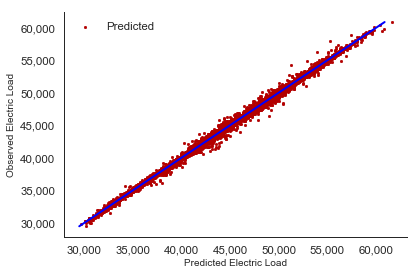

In [58]:
import statsmodels.api as sm

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
pred = xgb.predict(X_test[:7000])
y_test1=y_test[:7000].values

test = pd.DataFrame({"prediction": pred, "observed": y_test1.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(pred.flatten(), y_test1.flatten())
fig = plt.figure(figsize=(18,9))
labels ='Predicted'
ax1=test.plot(figsize = [6,4],
          x ="prediction", y = "observed", kind = "scatter", marker='.',color = '#b30000',
              label=labels)

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel("Predicted Electric Load", fontsize = 10) 
plt.ylabel("Observed Electric Load", fontsize = 10)
plt.legend(frameon=False)
ax1.plot(z[:,0], z[:,1], color = "blue", lw= 2)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('Fig15.png',bbox_inches='tight',dpi=550)

## Validation Curves

In [42]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgboost.XGBRegressor(n_estimators=150, max_depth=20)
model.fit(X_train, y_train, eval_metric="rmse", early_stopping_rounds=10, eval_set=eval_set, verbose=True)
results = model.evals_result()
#print(results)

[0]	validation_0-rmse:51584	validation_1-rmse:49085.8
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:46431	validation_1-rmse:44179.2
[2]	validation_0-rmse:41793.3	validation_1-rmse:39763.6
[3]	validation_0-rmse:37619.5	validation_1-rmse:35787.7
[4]	validation_0-rmse:33863.1	validation_1-rmse:32209.1
[5]	validation_0-rmse:30482.5	validation_1-rmse:28989.1
[6]	validation_0-rmse:27440.1	validation_1-rmse:26091.6
[7]	validation_0-rmse:24702.1	validation_1-rmse:23483.9
[8]	validation_0-rmse:22238.1	validation_1-rmse:21138
[9]	validation_0-rmse:20020.8	validation_1-rmse:19027.2
[10]	validation_0-rmse:18025.4	validation_1-rmse:17127.3
[11]	validation_0-rmse:16229.7	validation_1-rmse:15417.8
[12]	validation_0-rmse:14614	validation_1-rmse:13879.2
[13]	validation_0-rmse:13160	validation_1-rmse:12495.4
[14]	validation_0-rmse:11851.7	validation_1-rmse:11250.4
[15]	v

[142]	validation_0-rmse:22.0861	validation_1-rmse:398.085
[143]	validation_0-rmse:21.9929	validation_1-rmse:398.08
[144]	validation_0-rmse:21.8581	validation_1-rmse:398.074
[145]	validation_0-rmse:21.7756	validation_1-rmse:398.07
[146]	validation_0-rmse:21.6971	validation_1-rmse:398.06
[147]	validation_0-rmse:21.6127	validation_1-rmse:398.045
[148]	validation_0-rmse:21.5377	validation_1-rmse:398.032
[149]	validation_0-rmse:21.3663	validation_1-rmse:398.028


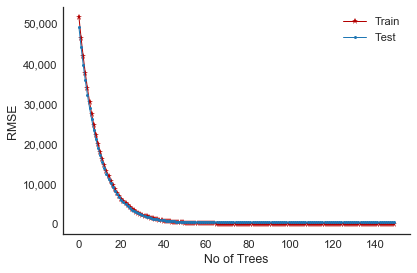

In [43]:
# plot RMSE error
sns.set_style('white')
sns.set_context("paper", font_scale=1.4)  
fig, ax = plt.subplots()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

ax.plot(x_axis, results['validation_0']['rmse'], linewidth=1,marker='*', markersize=7, color = '#b30000',label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], linewidth=1,marker='o',markersize=3, label='Test')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.legend()
plt.xlabel('No of Trees')
plt.ylabel('RMSE')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('Fig16.png', bbox_inches='tight', dpi=300)

[0.02658758 0.02689318 0.0701362  0.00802906 0.0715531  0.05350855
 0.04175667 0.05657154 0.03485974 0.03115081 0.02899074 0.025768
 0.020538   0.02132285 0.02378852 0.02389965 0.01997541 0.02257305
 0.02037825 0.0207047  0.02076721 0.02072553 0.0209339  0.01980872
 0.01859325 0.01973926 0.02149649 0.02016294 0.01916278 0.01893358
 0.01867659 0.02199657 0.02014905 0.02136452 0.0214062  0.02185766
 0.02524014]


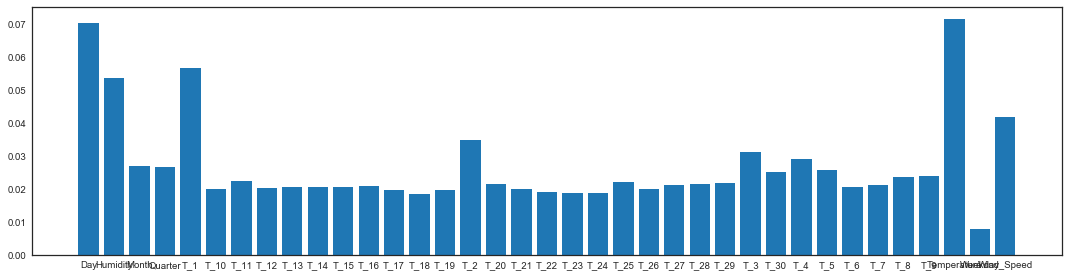

In [41]:
a=X_train.columns.tolist()
print(model.feature_importances_)
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
plt.figure(figsize=(15,4))
plt.bar(a, model.feature_importances_)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
gbm_param_grid = {
    'n_estimators': [100,125,150],
    'max_depth': [10,12,15,20]}
gbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(estimator=gbm, param_grid = gbm_param_grid, scoring='neg_mean_squared_error', cv = 4, verbose = 1)

# Fit grid_mse to the data
grid_mse.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 78.0min finished


Best parameters found:  {'max_depth': 20, 'n_estimators': 150}
Lowest RMSE found:  476.8753635319435


In [56]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {'n_estimators': [100,125,150], 'max_depth': [8,12,15],
                 'learning_rate':[0.1,0.2,0.25], 'min_child_weight':[10,15,20]}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

randomized_mse = RandomizedSearchCV(estimator = gbm, param_distributions = gbm_param_grid, 
                                    n_iter = 5, scoring = 'neg_mean_squared_error', cv = 4, verbose = 1)

# Fit randomized_mse to the data
randomized_mse.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 17.1min finished


Best parameters found:  {'n_estimators': 125, 'min_child_weight': 20, 'max_depth': 12, 'learning_rate': 0.2}
Lowest RMSE found:  513.3990139313998


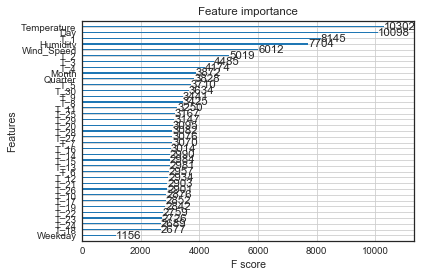

In [45]:
#print(xgb.feature_importances_)
from xgboost import plot_importance
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
plt.figure(figsize=(15,4))
plot_importance(xgb)
plt.tight_layout()

In [34]:
testPredict=xgb.predict(X_test)


## Horizon Forecast

In [36]:
from sklearn.metrics import mean_absolute_error
print ('0-12 Hour results')
print('Mean Absolute Error:', mean_absolute_error(y_test[0:24], testPredict[0:24]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0:24], testPredict[0:24])))
print(np.mean(y_test[0:24]))


print ('0-24 Hour results')
print('Mean Absolute Error:', mean_absolute_error(y_test[0:48], testPredict[0:48]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0:48], testPredict[0:48])))
print(np.mean(y_test[0:48]))


print ('0-36 Hour results')
print('Mean Absolute Error:', mean_absolute_error(y_test[0:72], testPredict[0:72]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0:72], testPredict[0:72])))
print(np.mean(y_test[0:72]))


print ('0-2 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[0:96], testPredict[0:96]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0:96], testPredict[0:96])))
print(np.mean(y_test[0:96]))


print ('1-3 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[48:192], testPredict[48:192]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[48:192], testPredict[48:192])))
print(np.mean(y_test[48:192]))

print ('3-5 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[144:240], testPredict[144:240]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[144:240], testPredict[144:240])))
print(np.mean(y_test[144:240]))

print ('7-8 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[336:384], testPredict[336:384]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[336:384], testPredict[336:384])))
print(np.mean(y_test[336:384]))

print ('8-10 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[384:480], testPredict[384:480]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[384:480], testPredict[384:480])))
print(np.mean(y_test[384:480]))

print ('14-15 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[672:720], testPredict[672:720]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[672:720], testPredict[672:720])))
print(np.mean(y_test[672:720]))

print ('15-17 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[720:816], testPredict[720:816]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[720:816], testPredict[720:816])))
print(np.mean(y_test[720:816]))

print ('30-31 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[1440:1488], testPredict[1440:1488]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[1440:1488], testPredict[1440:1488])))
print(np.mean(y_test[1440:1488]))

print ('31-33 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[1488:1536], testPredict[1488:1536]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[1488:1536], testPredict[1488:1536])))
print(np.mean(y_test[1488:1536]))


print ('45-46 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[2160:2208], testPredict[2160:2208]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[2160:2208], testPredict[2160:2208])))
print(np.mean(y_test[2160:2208]))

print ('46-48 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[2208:2304], testPredict[2208:2304]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[2208:2304], testPredict[2208:2304])))
print(np.mean(y_test[2208:2304]))

print ('60-61 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[2880:2928], testPredict[2880:2928]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[2880:2928], testPredict[2880:2928])))
print(np.mean(y_test[2880:2928]))

print ('61-63 Days results')
print('Mean Absolute Error:', mean_absolute_error(y_test[2928:3024], testPredict[2928:3024]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test[2928:3024], testPredict[2928:3024])))
print(np.mean(y_test[2928:3024]))

0-12 Hour results
Mean Absolute Error: 227.35563151041666
Mean Squared Error: 278.26603341214087
45077.291666666664
0-24 Hour results
Mean Absolute Error: 293.8710123697917
Mean Squared Error: 393.2343787263288
46626.3125
0-36 Hour results
Mean Absolute Error: 260.9334309895833
Mean Squared Error: 349.68222672122045
46636.5
0-2 Days results
Mean Absolute Error: 257.8352864583333
Mean Squared Error: 336.2893907762
47188.90625
1-3 Days results
Mean Absolute Error: 219.81806098090277
Mean Squared Error: 270.6542930505364
48182.15972222222
3-5 Days results
Mean Absolute Error: 254.906005859375
Mean Squared Error: 315.63486506942854
47876.447916666664
7-8 Days results
Mean Absolute Error: 259.6912841796875
Mean Squared Error: 343.29397700879247
40207.875
8-10 Days results
Mean Absolute Error: 239.78299967447916
Mean Squared Error: 335.6955286352733
47691.802083333336
14-15 Days results
Mean Absolute Error: 344.713623046875
Mean Squared Error: 438.8793086249057
46145.270833333336
15-17 Days 

## Artificial Neural Network

In [15]:
from sklearn.neural_network import MLPRegressor

In [24]:
from sklearn.neural_network import MLPRegressor
mlr = MLPRegressor(hidden_layer_sizes=(100,80,70,40,30),activation='relu', solver='adam', 
                   learning_rate = 'adaptive', batch_size='auto', max_iter=500,
                   early_stopping=False, )
mlr.fit(X_train,y_train)
predictions = mlr.predict(X_test)

In [61]:
X_test.shape

(45308, 36)

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
model = Sequential()
model.add(Dense(100, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(70, kernel_initializer='normal', activation='relu'))
model.add(Dense(40, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, batch_size=125, epochs=100)

Epoch 1/100
112484/112484 [==============================] - 2s 14us/step - loss: 634965623.4209
Epoch 2/100
112484/112484 [==============================] - 1s 10us/step - loss: 55135346.4866
Epoch 3/100
112484/112484 [==============================] - 1s 10us/step - loss: 42835816.8262
Epoch 4/100
112484/112484 [==============================] - 1s 10us/step - loss: 30304370.4078
Epoch 5/100
112484/112484 [==============================] - 1s 10us/step - loss: 19903086.0495
Epoch 6/100
112484/112484 [==============================] - 1s 10us/step - loss: 11674823.7228
Epoch 7/100
112484/112484 [==============================] - 1s 11us/step - loss: 8322467.6707
Epoch 8/100
112484/112484 [==============================] - 1s 12us/step - loss: 6698228.0276
Epoch 9/100
112484/112484 [==============================] - 2s 14us/step - loss: 5703460.9916
Epoch 10/100
112484/112484 [==============================] - 2s 14us/step - loss: 5095950.3032
Epoch 11/100
112484/112484 [==============

In [73]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, model.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, model.predict(X_test)))

Train Score: 963.418 RMSE
Test Score: 971.35 RMSE
Train Score: %.2f MAE 730.6297201678406
Test Score: %.2f MAE 730.3544397253934


## Machine Learning Modeling

1. Ridge Regression
2. k-Nearest Neighbors
3. Random Forest Regressor
4. GradientBoostingRegresso
5. ExtraTreesRegressor
6. Neural Network

Mean Absolute Deviation MAD: The average of the absolute values of the devition between the actual and forecast. The absolute error is the absolute value of the difference between the forecasted value and the actual value. MAE tells us how big of an error we can expect from the forecast on average.

The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. MAPE allows us to compare forecasts of different series in different scales.

In [139]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_test, benchmark_model.predict(X_test))),
        "MAE": mean_absolute_error(y_test, benchmark_model.predict(X_test)),
        "MAPE": MAPError(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model.score(X_train, y_train),
        "Testing Scores" :benchmark_model.score(X_test, y_test),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,MAE,MAPE,RMSE,Testing Scores,Training Scores,Training Times
Ridge,637.86,1.23,855.75,0.99,1.00,0.09
KNeighborsRegressor,1052.02,2.03,1404.82,0.98,1.00,2.30
RandomForestRegressor,370.66,0.70,540.40,1.00,1.00,27.83
GradientBoostingRegressor,748.57,1.44,1024.94,0.99,0.99,21.48
MLPRegressor,1595.29,3.10,2049.26,0.97,0.97,250.03
ExtraTreesRegressor,321.21,0.61,467.37,1.00,1.00,8.74
Linear Regression (Benchmark),630.89,1.22,847.13,0.99,1.00,0.14


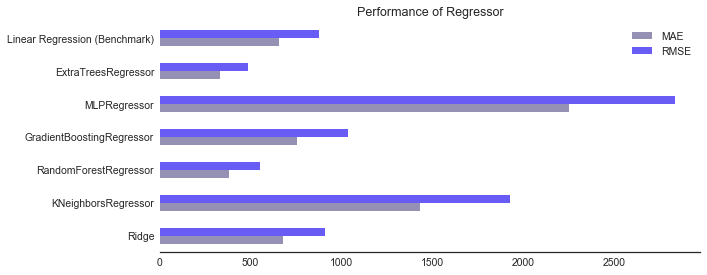

In [308]:
# Plot to compare the performance of Models on both datasets
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout() 
plt.savefig('book1.png', dpi=300, frameon=False) 
plt.show()

## Hyper Parameter Tuning of Extra Trees Regressor

A Meta Estimator that fits a number of randomized decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

1. No of Trees
2. No of Features to Consider
3. Max Depth of Tree


In [140]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor()

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 75, 100, 150],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [50, 100,150, 200, 250]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring="mean_squared_error", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 75, 100, 150], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [50, 100, 150, 200, 250]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='mean_squared_error',
          verbose=2)

In [141]:
#Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 100}


## Forecasting Metrics after Tuning

In [142]:
best_model = grid_search.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(y_test, best_model.predict(X_test)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))
print('Mean Absolute Percentage Error:',MAPError(y_test, best_model.predict(X_test)))

Mean Absolute Error: 295.797717058
Mean Squared Error: 431.240757219
Mean Absolute Percentage Error: 0.560967048582


### GridSearch CV

In [92]:
from sklearn.grid_search import GridSearchCV
clf = ExtraTreesRegressor()

param_grid = {
    "n_estimators": [10, 50, 75, 100, 150],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [50, 100,150, 200, 250]
}


gs_cv = GridSearchCV(clf, param_grid, scoring="mean_squared_error", cv=3, n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
gs_cv.best_params_

#Display best params
print("Parameters of best Regressor : {}".format(gs_cv.best_params_))

best_model = gs_cv.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(y_test, best_model.predict(X_test)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))
print('Mean Absolute Percentage Error:',MAPError(y_test, best_model.predict(X_test)))

Parameters of best Regressor : {'max_depth': 200, 'max_features': 'auto', 'n_estimators': 150}
Mean Absolute Error: 292.492209228
Mean Squared Error: 428.01855683
Mean Absolute Percentage Error: 0.555118277739


In [ ]:
#trainPredict1=pd.DataFrame(trainPredict)
#trainY1=pd.DataFrame(trainY)
#trainY1=trainY1.transpose()

testPredict1=pd.DataFrame(best_model.predict(X_test))
testY1=pd.DataFrame(y_test)
testY1=testY1.transpose()

sns.set_style('white')
sns.set_context("paper", font_scale=1.5)  
plt.figure(figsize=(14,6))
plt.plot(y_test[800:1600], label = "Test Data")
plt.plot(testPredict1[800:1600], label = "Test Predict")
plt.legend();

In [184]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    

    error = mean_squared_error(y_true, y_predict)
    return error

In [235]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = plt.figure(figsize=(6,4))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([150]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = ExtraTreesRegressor(n_estimators=100, max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        sns.set_style('white')
        sns.set_context("paper", font_scale=1.3)
        #ax = fig.add_subplot(2, 2, k+1)
        plt.plot(sizes, test_err, label = 'Testing Error')
        plt.plot(sizes, train_err, label = 'Training Error')
        plt.legend()
        #ax.set_title('max_depth = %s'%(depth))
        plt.xlabel('Number of Data Points')
        plt.ylabel('Mean Squared Error')
        plt.xlim([0, len(X_train)])
    
    # Visual aesthetics
      
    fig.tight_layout()
    sns.despine(left=True)
    fig.show()
    plt.savefig('Trees.jpeg', dpi=200)

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


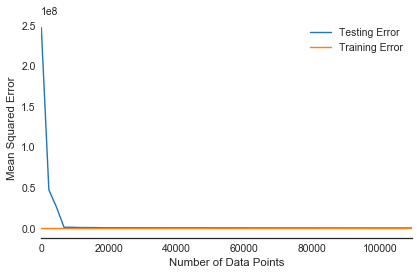

In [236]:
learning_curves(X_train, y_train, X_test, y_test)

## Feature Importance by the Tree Based Model

Mean Squared Error which was the feature selection criteria to measure the quality of the split

In [143]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

#print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
#for index in feature_indices[::-1][:5]:
    #print(X_train.columns[index])
    
#print("\nTop 5 least important features:-")
#for index in feature_indices[:5]:
    #print(X_train.columns[index])

Most important feature = T_1
Least important feature = Day


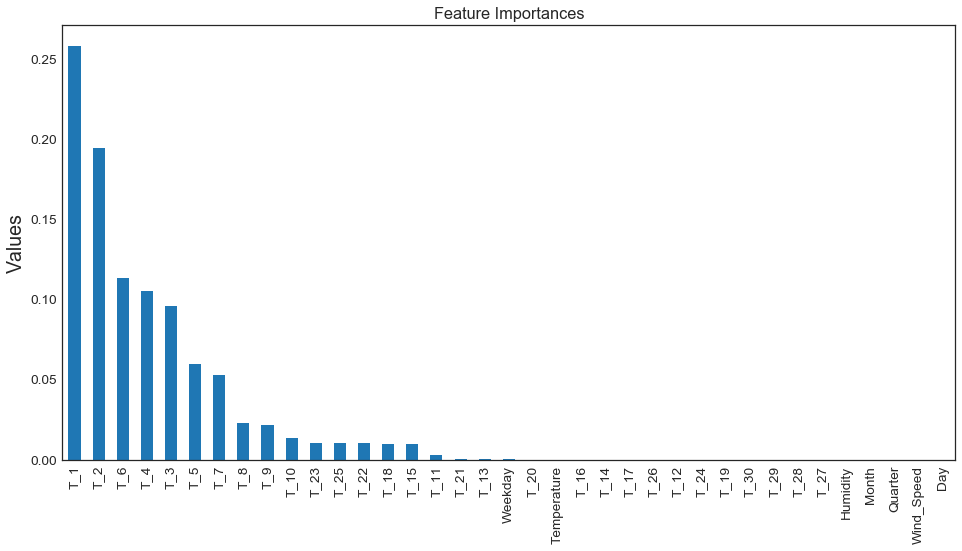

In [144]:
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False)
fi.head()
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()